In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Configuration du style des graphiques
plt.style.use('seaborn')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12 #corrige ce code


OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [3]:
# Chargement des données
df = pd.read_csv('../data/phe_analysis/enrichissement.csv')
print(f"Nombre total de mutants : {len(df)}")
print(f"Nombre de phénotypes uniques : {df['phenotype'].nunique()}")
print("\nPhénotypes présents :")
print(df['phenotype'].value_counts())

Nombre total de mutants : 61
Nombre de phénotypes uniques : 24

Phénotypes présents :
phenotype
trypsin                   14
ELSE                      13
chymotrypsin               7
not trypsin                5
granzyme                   2
fibrinolytic               1
serine protease I          1
ref_tryp                   1
enamel matrix              1
tryptase                   1
adrenal mitochondria       1
testis serine protease     1
haptoglobin                1
hgf                        1
f12                        1
enteropeptidase            1
clotting factor g          1
allergen                   1
adipsin                    1
thrombin                   1
elastase                   1
ref_chym                   1
plasminogen activator      1
f viia                     1
Name: count, dtype: int64


In [26]:
# Identification des contrôles
ref_tryp = df[df['mutant'] == 'Mus musculus,Mammalia,Rodentia,Muridae,NA,ref_tryp']['enrichment'].values[0]
ref_chym = df[df['mutant'] == 'Bos taurus,Mammalia,Artiodactyla,Bovidae,NA,ref_chym']['enrichment'].values[0]


In [27]:
print(f"\nEnrichissement contrôle negatif (ref_tryp) : {ref_tryp:.2f}")
print(f"Enrichissement contrôle positif (ref_chym) : {ref_chym:.2f}")


Enrichissement contrôle negatif (ref_tryp) : -2.12
Enrichissement contrôle positif (ref_chym) : -0.14


In [28]:
# Calcul des statistiques par phénotype
stats_by_phenotype = df.groupby('phenotype').agg({
    'enrichment': ['mean', 'std', 'count']
}).round(2)
stats_by_phenotype.columns = ['moyenne', 'ecart_type', 'nombre']
stats_by_phenotype = stats_by_phenotype.sort_values('moyenne', ascending=False)

In [29]:
print("\nTop 5 phénotypes les plus enrichis :")
print(stats_by_phenotype.head())
print("\nTop 5 phénotypes les moins enrichis :")
print(stats_by_phenotype.tail())


Top 5 phénotypes les plus enrichis :
                       moyenne  ecart_type  nombre
phenotype                                         
clotting factor g         0.79         NaN       1
granzyme                  0.37        0.39       2
plasminogen activator     0.22         NaN       1
ref_chym                 -0.14         NaN       1
elastase                 -0.36         NaN       1

Top 5 phénotypes les moins enrichis :
                   moyenne  ecart_type  nombre
phenotype                                     
tryptase             -1.31         NaN       1
enamel matrix        -1.99         NaN       1
ref_tryp             -2.12         NaN       1
serine protease I    -2.43         NaN       1
f viia               -2.76         NaN       1


/var/folders/3v/z1mdlfgd5m76998rjs22pnv00000gn/T/ipykernel_33231/1547504705.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(data=df, x='phenotype', y='enrichment', color='black',
/var/folders/3v/z1mdlfgd5m76998rjs22pnv00000gn/T/ipykernel_33231/1547504705.py:6: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=df, x='phenotype', y='enrichment', color='black',
/var/folders/3v/z1mdlfgd5m76998rjs22pnv00000gn/T/ipykernel_33231/1547504705.py:6: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df, x='phenotype', y='enrichment', color='black',


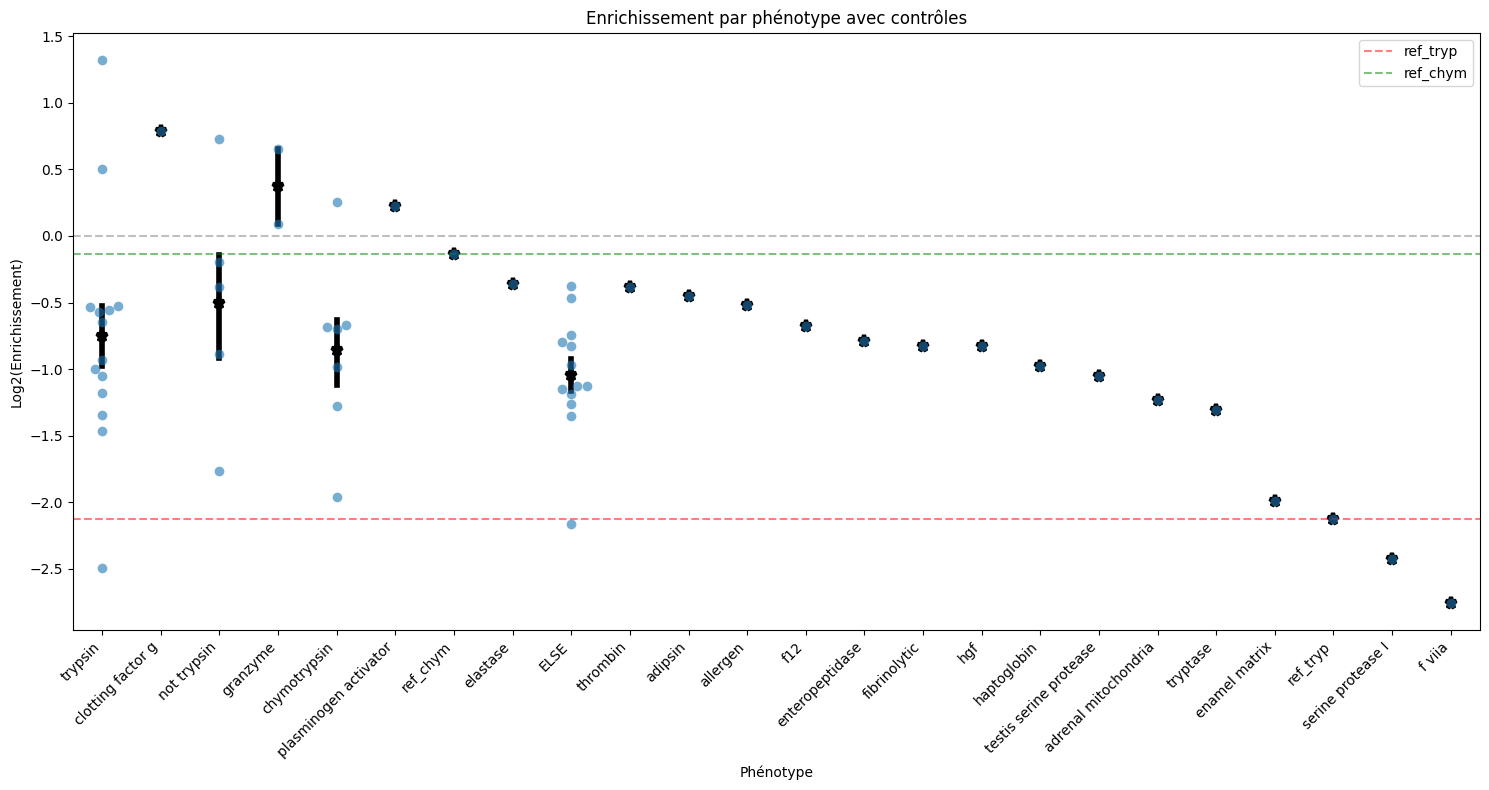

In [ ]:


# Création du graphique de comparaison
plt.figure(figsize=(15, 8))
# Création du swarmplot
sns.swarmplot(data=df, x='phenotype', y='enrichment', size=7, alpha=0.6)
# Ajout des moyennes et écarts-types
sns.pointplot(data=df, x='phenotype', y='enrichment', color='black', 
             markers='*', scale=1.5, ci=68, join=False)
# Lignes de référence
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=ref_tryp, color='red', linestyle='--', alpha=0.5, label='ref_tryp')
plt.axhline(y=ref_chym, color='green', linestyle='--', alpha=0.5, label='ref_chym')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Phénotype')
plt.ylabel('Log2(Enrichissement)')
plt.title('Enrichissement par phénotype avec contrôles')
plt.legend()
plt.tight_layout()
plt.savefig('../data/phe_analysis/enrichment_with_controls.png', dpi=300, bbox_inches='tight')

In [32]:
# Analyse statistique
results = []
for phenotype in df['phenotype'].unique():
    phenotype_data = df[df['phenotype'] == phenotype]['enrichment']
    
    # Test statistique vs ref_tryp
    t_stat_tryp, p_val_tryp = stats.ttest_1samp(phenotype_data, ref_tryp)
    
    # Test statistique vs ref_chym
    t_stat_chym, p_val_chym = stats.ttest_1samp(phenotype_data, ref_chym)
    
    results.append({
        'phenotype': phenotype,
        'moyenne': phenotype_data.mean(),
        'ecart_type': phenotype_data.std(),
        'nombre_mutants': len(phenotype_data),
        'p_value_vs_tryp': p_val_tryp,
        'p_value_vs_chym': p_val_chym
    })

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [33]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('moyenne', ascending=False)
results_df.to_csv('../data/phe_analysis/phenotype_statistics.csv', index=False)

In [34]:
print("\nRésultats de l'analyse statistique :")
print(results_df.round(3)) 


Résultats de l'analyse statistique :
                 phenotype  moyenne  ecart_type  nombre_mutants  \
1        clotting factor g    0.788         NaN               1   
3                 granzyme    0.372       0.395               2   
5    plasminogen activator    0.222         NaN               1   
6                 ref_chym   -0.137         NaN               1   
7                 elastase   -0.358         NaN               1   
9                 thrombin   -0.383         NaN               1   
10                 adipsin   -0.451         NaN               1   
2              not trypsin   -0.501       0.918               5   
11                allergen   -0.521         NaN               1   
13                     f12   -0.678         NaN               1   
0                  trypsin   -0.748       0.891              14   
14         enteropeptidase   -0.790         NaN               1   
15            fibrinolytic   -0.826         NaN               1   
16                     h